## Project Overview: Facebook Ads Performance Analysis

This project analyzes Facebook advertising campaign data to evaluate marketing performance and key efficiency metrics across time and campaigns. The following questions are addressed through data aggregation and visualization:

- What is the daily advertising spend and ROMI (Return On Merketing Investment) throughout 2021?
- How do spending and ROMI trends change when using a rolling average?
- What are the total ad spend and ROMI by campaign?
- What is the distribution of daily ROMI for each campaign?
- What does the overall distribution of ROMI values look like?
- What are the correlations between numeric advertising metrics?
- How strong is the relationship between total spend and total value?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('facebook_ads_data (2.0).csv')
#loading the dataset

In [3]:
df.info()
#checking dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [21]:
df.head(5)
#previewing first rows

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [24]:
df.describe()
#summary statistics

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,2021-09-14 10:53:29.638554112,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
min,2020-11-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,2021-06-24 00:00:00,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,2021-08-26 00:00:00,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,2021-11-27 18:00:00,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2022-11-05 00:00:00,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911
std,NaN,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012


In [6]:
df['ad_date'] = pd.to_datetime(df['ad_date'])
df.head()
#turning 'ad_date' to datetime format

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [8]:
df_21 = df[(df['ad_date'] >= '2021-01-01') & (df['ad_date'] <= '2021-12-31')]
#creating a new dataframe with dates only from 2021

In [10]:
daily_stats = df_21.groupby('ad_date').agg({
    'total_spend': 'sum',
    'total_value': 'sum'
}).reset_index()
daily_stats.head()
#new dataframe where data is grouped by date and totals are summed up for each day

,ad_date,total_spend,total_value
0,2021-01-01,0.39,0.59
1,2021-01-02,7.74,6.90
2,2021-01-04,70.06,68.47
3,2021-01-05,81.15,61.68
4,2021-01-06,142.77,145.97


In [11]:
daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']
daily_stats['spend_rolling'] = daily_stats['total_spend'].rolling(window=7).mean()
daily_stats['romi_rolling'] = daily_stats['romi'].rolling(window=7).mean()
#calculating ROMI and rolling averages

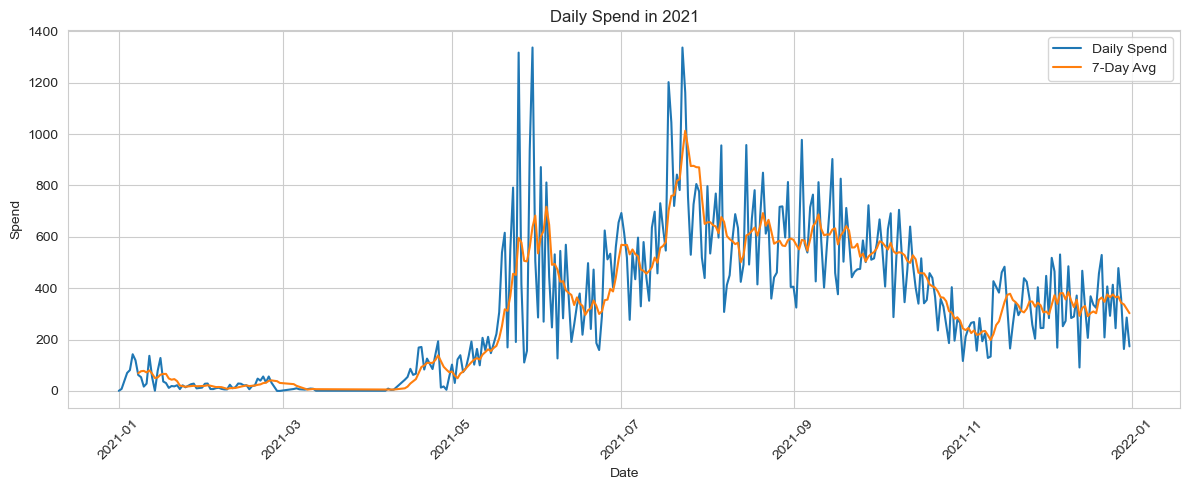

In [12]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_stats, x='ad_date', y='total_spend', label='Daily Spend')
sns.lineplot(data=daily_stats, x='ad_date', y='spend_rolling', label='7-Day Avg')
plt.title('Daily Spend in 2021')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#plotting spend with rolling average

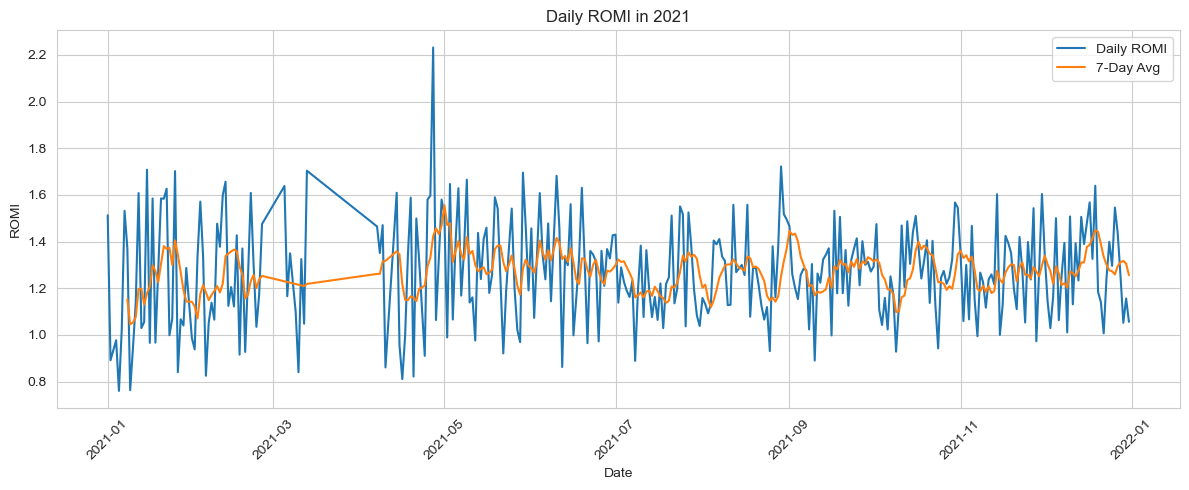

In [13]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_stats, x='ad_date', y='romi', label='Daily ROMI')
sns.lineplot(data=daily_stats, x='ad_date', y='romi_rolling', label='7-Day Avg')
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#plotting romi with rolling average

In [14]:
campaign_group = df.groupby('campaign_name').agg({
    'total_spend': 'sum',
    'total_value': 'sum'
})
campaign_group['romi'] = campaign_group['total_value'] / campaign_group['total_spend']
#grouping total spend and value by campaign

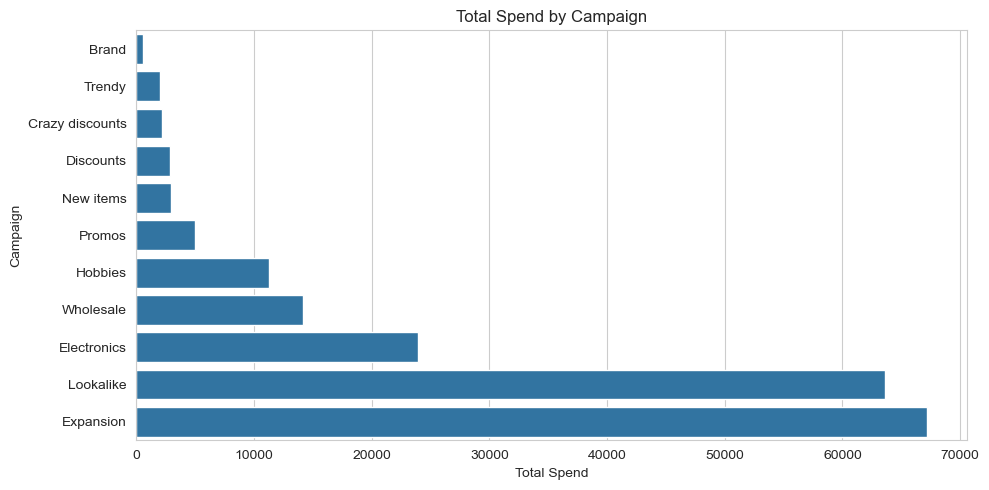

In [26]:
sorted_spend = campaign_group['total_spend'].sort_values(ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_spend.values, y=sorted_spend.index)
plt.title('Total Spend by Campaign')
plt.xlabel('Total Spend')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()
#barplot for total spend by campaign

/var/folders/9t/zb9f4y411wqgx9f2mmjv9v0h0000gp/T/ipykernel_29809/690808119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_romi.values, y=sorted_romi.index, palette='crest')


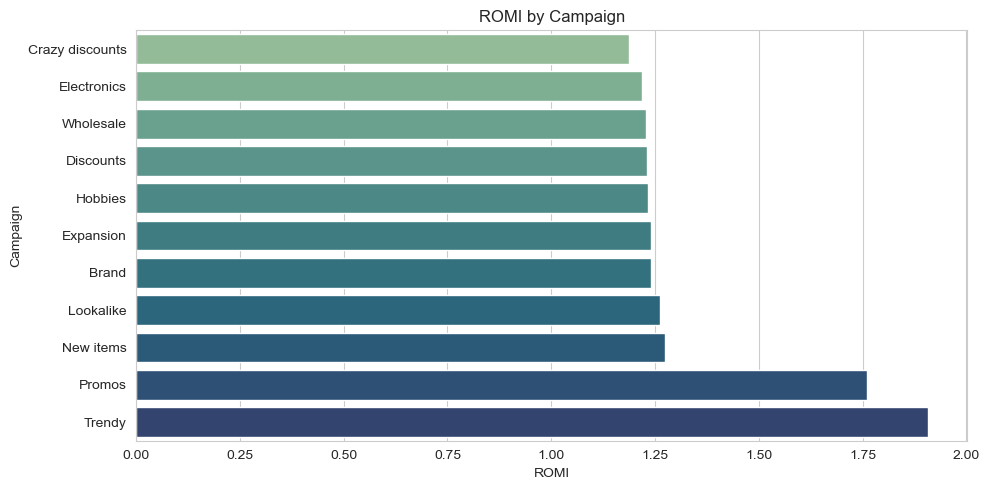

In [16]:
sorted_romi = campaign_group['romi'].sort_values(ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_romi.values, y=sorted_romi.index, palette='crest')
plt.title('ROMI by Campaign')
plt.xlabel('ROMI')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()
#barplot for romi by campaign

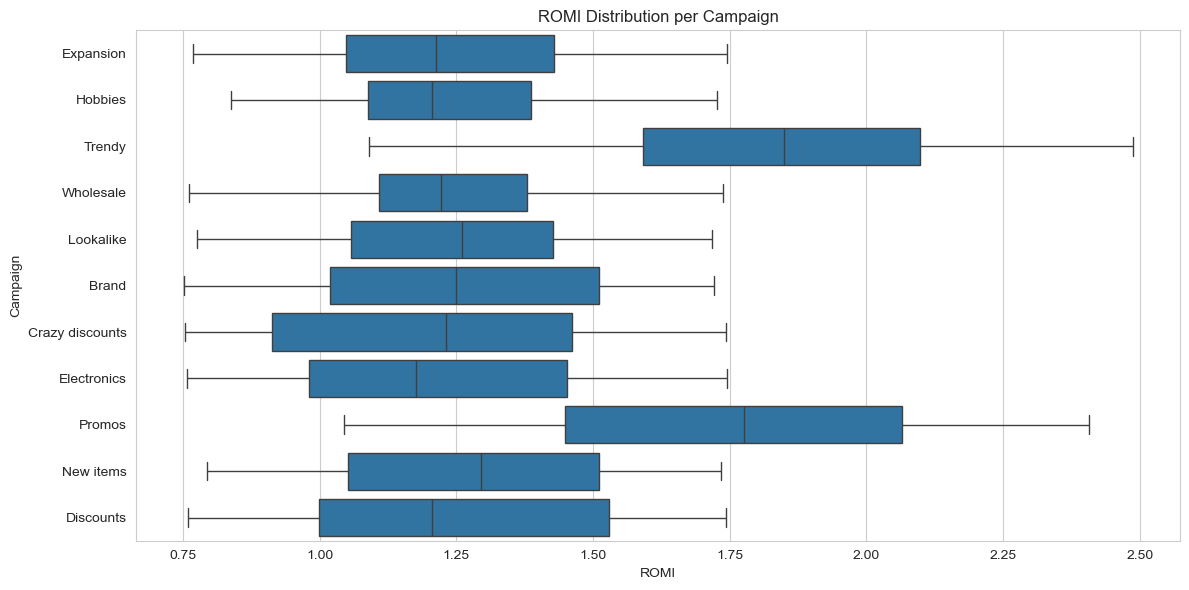

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='romi', y='campaign_name')
plt.title('ROMI Distribution per Campaign')
plt.xlabel('ROMI')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()
#boxplot to show ROMI distribution by campaign

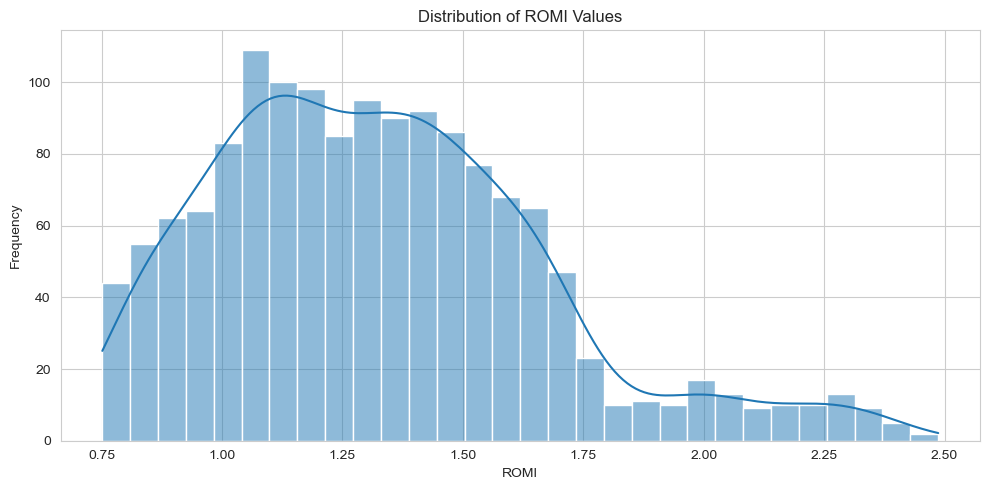

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['romi'].dropna(), bins=30, kde=True)
plt.title('Distribution of ROMI Values')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#histogram of romi

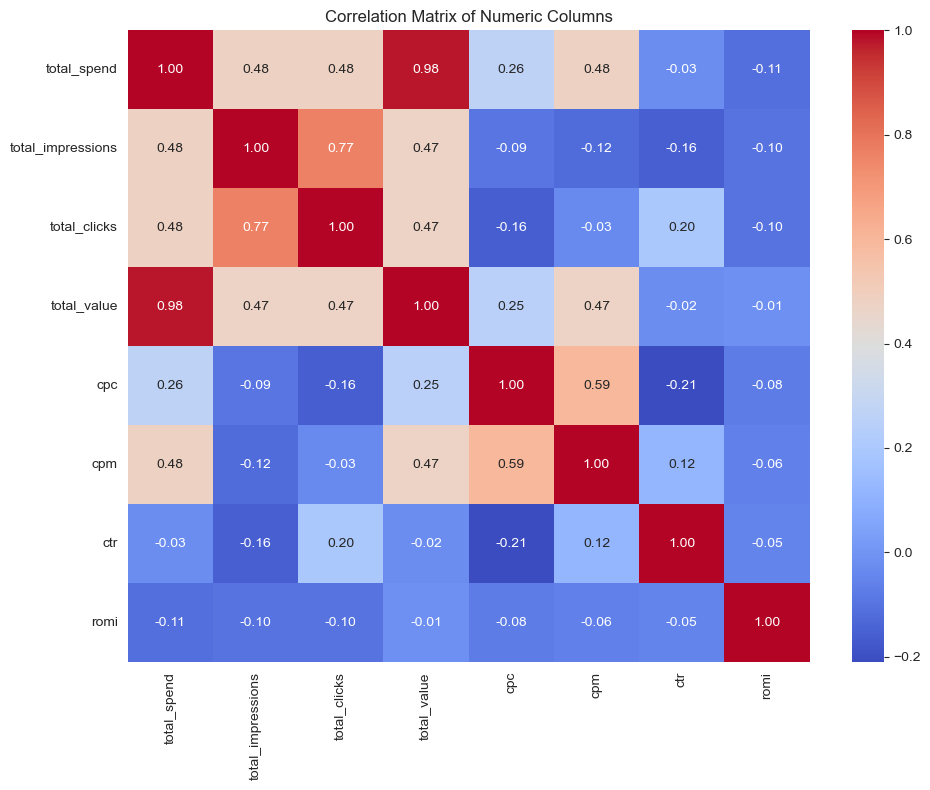

In [19]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()
#heatmap showing correlations

Values with the highest correlation -> Total Spend and Total Value 

Values with the lowest correlation -> CPC and CTR

Total Values correclates with Total Spend for 98%. And with Total Impressions, Total values and CPM it correlates for 47%

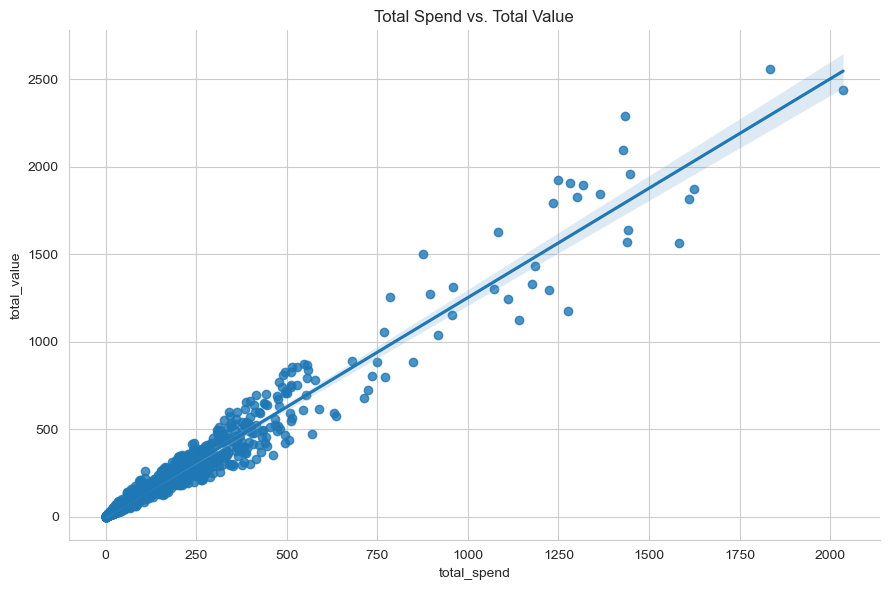

In [20]:
sns.lmplot(data=df, x='total_spend', y='total_value', height=6, aspect=1.5)
plt.title('Total Spend vs. Total Value')
plt.tight_layout()
plt.show()
#regression plot between spend and value